<a href="https://colab.research.google.com/github/Nivin2003/Final-Year-Project/blob/main/2_Copy_of_Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torch torchvision scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p /content/drive/MyDrive/BrainTumorDataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/drive/MyDrive/BrainTumorDataset/brain-tumor-mri-dataset.zip -d /content/drive/MyDrive/BrainTumorDataset/

Archive:  /content/drive/MyDrive/BrainTumorDataset/brain-tumor-mri-dataset.zip
replace /content/drive/MyDrive/BrainTumorDataset/Testing/glioma/Te-glTr_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:

train_path = "/content/drive/MyDrive/BrainTumorDataset/Training"
test_path = "/content/drive/MyDrive/BrainTumorDataset/Testing"

# Verify the dataset paths
import os
print("Train Path Exists:", os.path.exists(train_path))
print("Test Path Exists:", os.path.exists(test_path))

Train Path Exists: True
Test Path Exists: True


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])
# Load train and test datasets
train_data = datasets.ImageFolder(root=train_path, transform=transform)
test_data = datasets.ImageFolder(root=test_path, transform=transform)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Verify the class names and dataset size
print("Classes:", train_data.classes)
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of training samples: 5712
Number of test samples: 1311


In [ ]:
from transformers import ViTForImageClassification
import torch

In [ ]:
from transformers import ViTForImageClassification
import torch

# Load the pre-trained ViT model with the 'ignore_mismatched_sizes' argument
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=4,  # Number of tumor classes
    ignore_mismatched_sizes=True  # Allow mismatched sizes during loading
)


model.classifier = torch.nn.Linear(model.config.hidden_size, 4)

# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Verify the model architecture
print(model)



Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import ViTFeatureExtractor

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ViT input size
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for pre-trained ViT
])

# Define the paths to your datasets
train_dir = '/content/drive/MyDrive/BrainTumorDataset/Training'
test_dir = '/content/drive/MyDrive/BrainTumorDataset/Testing'


In [ ]:
# Create dataset for training and testing
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
from torch import optim
from torch import nn
from tqdm import tqdm

# Initialize optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 10  # You can increase this based on your preference
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate through the training data
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs.logits, labels)
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

        # Track accuracy
        _, preds = torch.max(outputs.logits, 1)
        correct_predictions += torch.sum(preds == labels)
        total_predictions += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions * 100

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Validation step after each epoch
    model.eval()
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs.logits, 1)
            val_correct_predictions += torch.sum(preds == labels)
            val_total_predictions += labels.size(0)

    val_accuracy = val_correct_predictions / val_total_predictions * 100
    print(f"Validation Accuracy: {val_accuracy:.2f}%")

Epoch 1/10: 100%|██████████| 357/357 [03:36<00:00,  1.65it/s]


Epoch 1/10 - Loss: 0.0312, Accuracy: 99.26%
Validation Accuracy: 99.08%


Epoch 2/10: 100%|██████████| 357/357 [03:36<00:00,  1.65it/s]


Epoch 2/10 - Loss: 0.0170, Accuracy: 99.46%
Validation Accuracy: 96.87%


Epoch 3/10: 100%|██████████| 357/357 [03:36<00:00,  1.65it/s]


Epoch 3/10 - Loss: 0.0124, Accuracy: 99.56%
Validation Accuracy: 98.93%


Epoch 4/10: 100%|██████████| 357/357 [03:36<00:00,  1.65it/s]


Epoch 4/10 - Loss: 0.0015, Accuracy: 99.96%
Validation Accuracy: 99.08%


Epoch 5/10: 100%|██████████| 357/357 [03:37<00:00,  1.65it/s]


Epoch 5/10 - Loss: 0.0127, Accuracy: 99.65%
Validation Accuracy: 98.47%


Epoch 6/10: 100%|██████████| 357/357 [03:37<00:00,  1.64it/s]


Epoch 6/10 - Loss: 0.0339, Accuracy: 98.97%
Validation Accuracy: 97.56%


Epoch 7/10: 100%|██████████| 357/357 [03:37<00:00,  1.64it/s]


Epoch 7/10 - Loss: 0.0052, Accuracy: 99.82%
Validation Accuracy: 98.70%


Epoch 8/10: 100%|██████████| 357/357 [03:38<00:00,  1.63it/s]


Epoch 8/10 - Loss: 0.0143, Accuracy: 99.58%
Validation Accuracy: 97.86%


Epoch 9/10: 100%|██████████| 357/357 [03:37<00:00,  1.64it/s]


Epoch 9/10 - Loss: 0.0207, Accuracy: 99.39%
Validation Accuracy: 98.47%


Epoch 10/10: 100%|██████████| 357/357 [03:36<00:00,  1.65it/s]


Epoch 10/10 - Loss: 0.0021, Accuracy: 99.93%
Validation Accuracy: 99.16%


In [ ]:
# Define the save path in Google Drive
save_path = '/content/drive/MyDrive/brain_tumor_model.pth'

# Save the model
torch.save(model.state_dict(), save_path)

print(f"Model saved to {save_path}")

Model saved to /content/drive/MyDrive/brain_tumor_model.pth


In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import os
from PIL import Image

# Define the transformations (same as for the training set)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a custom dataset class if necessary (if your data is in a folder structure)
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
        self.images = []
        self.labels = []

        # Load all images and labels from the root directory
        for label, class_name in enumerate(self.classes):
            class_folder = os.path.join(root_dir, class_name)
            for filename in os.listdir(class_folder):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    self.images.append(os.path.join(class_folder, filename))
                    self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Set the path to your testing data
test_dir = '/content/drive/MyDrive/BrainTumorDataset/Testing'

# Create the test dataset and dataloader
test_dataset = CustomDataset(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Model Accuracy: 95.35%
Model Loss: 0.2129


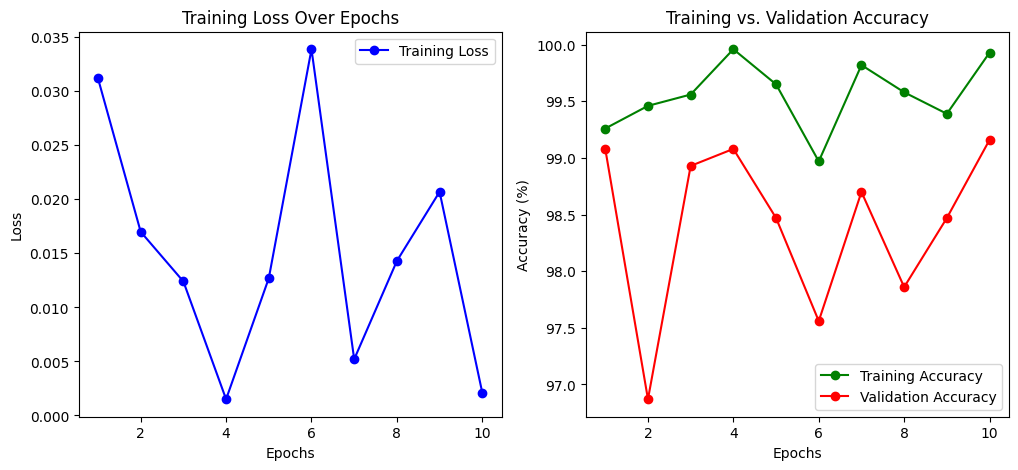

Precision: 0.9566, Recall: 0.9535, F1-score: 0.9536


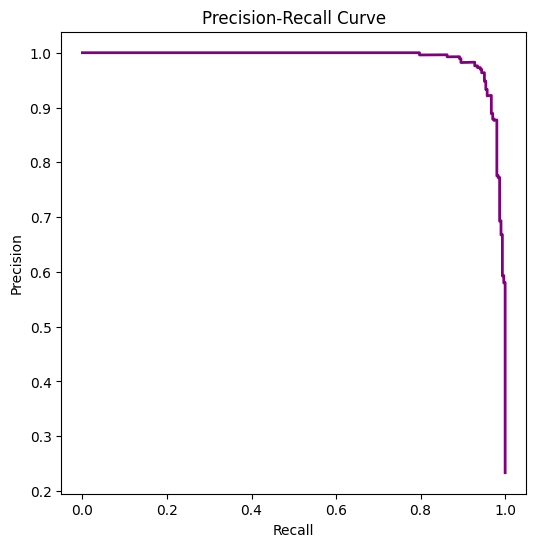

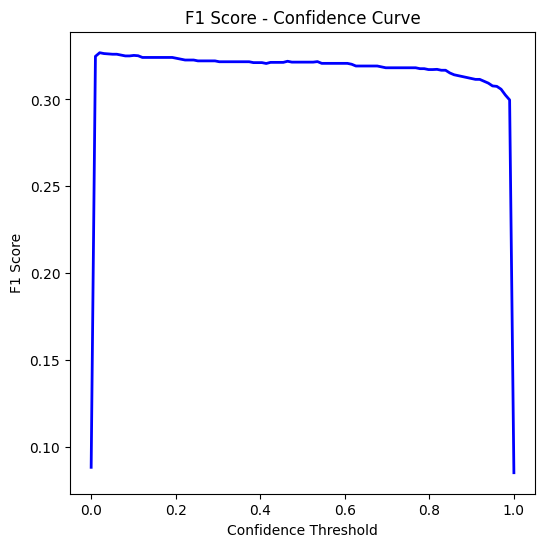

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

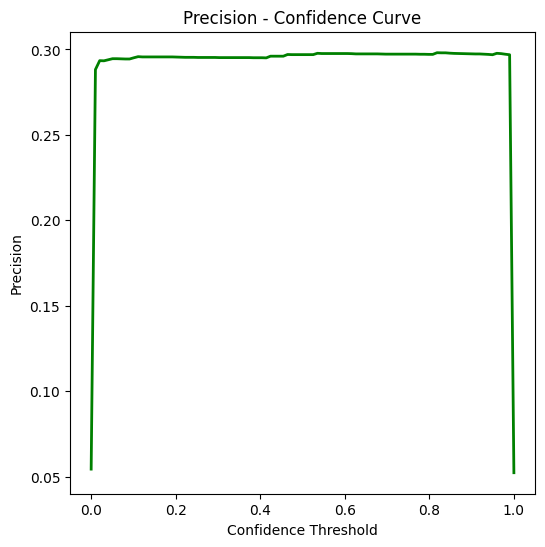

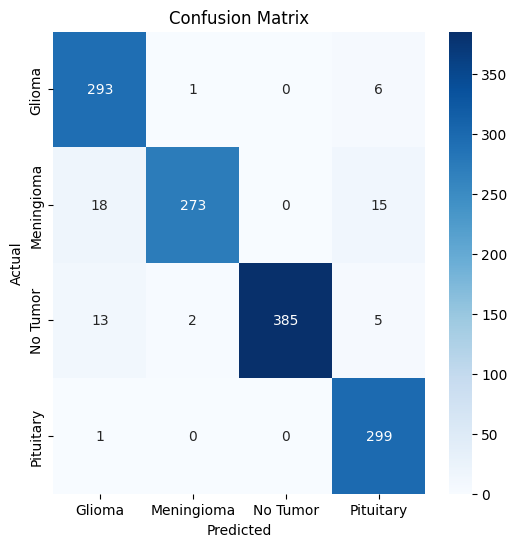

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_recall_curve, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# Assuming the test_loader is already defined and the model is trained

# Initialize the model in evaluation mode
model.eval()

# Initialize variables to store predictions and true labels
true_labels = []
predictions = []
probabilities = []
loss_fn = nn.CrossEntropyLoss()

# Track loss for model performance
test_loss = 0.0

# Calculate predictions and loss
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs.logits, labels)
        test_loss += loss.item()

        # Get the predicted classes and probabilities
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        _, preds = torch.max(probs, 1)

        # Store predictions, probabilities, and true labels
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(preds.cpu().numpy())
        probabilities.extend(probs.cpu().numpy())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)
probabilities = np.array(probabilities)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Average loss
average_loss = test_loss / len(test_loader)
print(f"Model Loss: {average_loss:.4f}")

# Plot Model Accuracy & Loss
# Provided training history
epochs = list(range(1, 11))  # 10 epochs

# Training loss per epoch
training_loss_history = [0.0312, 0.0170, 0.0124, 0.0015, 0.0127, 0.0339, 0.0052, 0.0143, 0.0207, 0.0021]

# Training accuracy per epoch
training_accuracy_history = [99.26, 99.46, 99.56, 99.96, 99.65, 98.97, 99.82, 99.58, 99.39, 99.93]

# Validation accuracy per epoch
validation_accuracy_history = [99.08, 96.87, 98.93, 99.08, 98.47, 97.56, 98.70, 97.86, 98.47, 99.16]

# Plot Training vs. Validation Loss & Accuracy
plt.figure(figsize=(12, 5))

# Training & Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss_history, label="Training Loss", color="blue", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show
# Training & Validation Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy_history, label="Training Accuracy", color="green", marker="o")
plt.plot(epochs, validation_accuracy_history, label="Validation Accuracy", color="red", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs. Validation Accuracy")
plt.legend()

plt.show()

# Compute Precision, Recall, and F1-score
precision = precision_score(true_labels, predictions, average="weighted")
recall = recall_score(true_labels, predictions, average="weighted")
f1 = f1_score(true_labels, predictions, average="weighted")

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Generate Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(true_labels, probabilities[:, 1], pos_label=1)

plt.figure(figsize=(6, 6))
plt.plot(recall_vals, precision_vals, color="purple", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Generate F1 Score - Confidence Curve
confidence_thresholds = np.linspace(0, 1, num=100)
f1_scores = []

for threshold in confidence_thresholds:
    preds_thresholded = (probabilities[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(true_labels, preds_thresholded, average="weighted"))

plt.figure(figsize=(6, 6))
plt.plot(confidence_thresholds, f1_scores, color="blue", linewidth=2)
plt.xlabel("Confidence Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score - Confidence Curve")
plt.show()

# Generate Precision - Confidence Curve
precision_scores = []

for threshold in confidence_thresholds:
    preds_thresholded = (probabilities[:, 1] >= threshold).astype(int)
    precision_scores.append(precision_score(true_labels, preds_thresholded, average="weighted"))

plt.figure(figsize=(6, 6))
plt.plot(confidence_thresholds, precision_scores, color="green", linewidth=2)
plt.xlabel("Confidence Threshold")
plt.ylabel("Precision")
plt.title("Precision - Confidence Curve")
plt.show()

# Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Glioma", "Meningioma", "No Tumor", "Pituitary"], yticklabels=["Glioma", "Meningioma", "No Tumor", "Pituitary"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


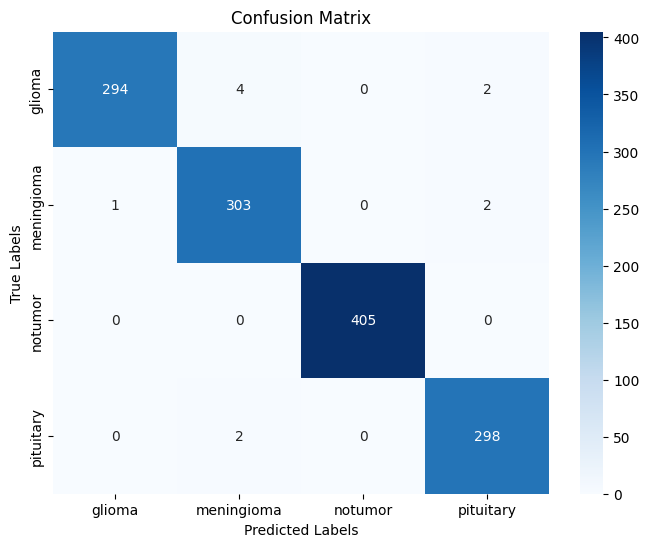

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'], yticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-28-c9b7515a9a86>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Th

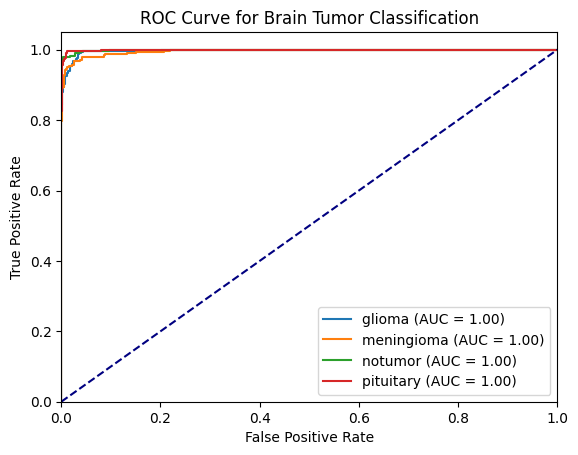

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from transformers import ViTForImageClassification, ViTImageProcessor
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

# Load the model and processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=4,
    ignore_mismatched_sizes=True
)
model.load_state_dict(torch.load('/content/drive/MyDrive/brain_tumor_model.pth', map_location=device))
model.to(device)
model.eval()

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Define class labels (for display purposes)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Assuming you have a test set in 'Testing' folder
test_data_path = '/content/drive/MyDrive/BrainTumorDataset/Testing'

# Define the data transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the expected input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])

# Load the test dataset using ImageFolder (assuming structure of Testing is correct)
test_dataset = datasets.ImageFolder(test_data_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Prepare variables for ROC curve
y_true = []
y_pred = []

# Loop through the test dataset
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Collect true labels and predicted probabilities
    y_true.extend(labels.cpu().numpy())
    y_pred.extend(probs.cpu().numpy())

# Binarize the true labels (required for multiclass ROC curve)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])  # Assuming 4 classes

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):  # For each class
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], np.array([x[i] for x in y_pred]))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Brain Tumor Classification')
plt.legend(loc='lower right')
plt.show()


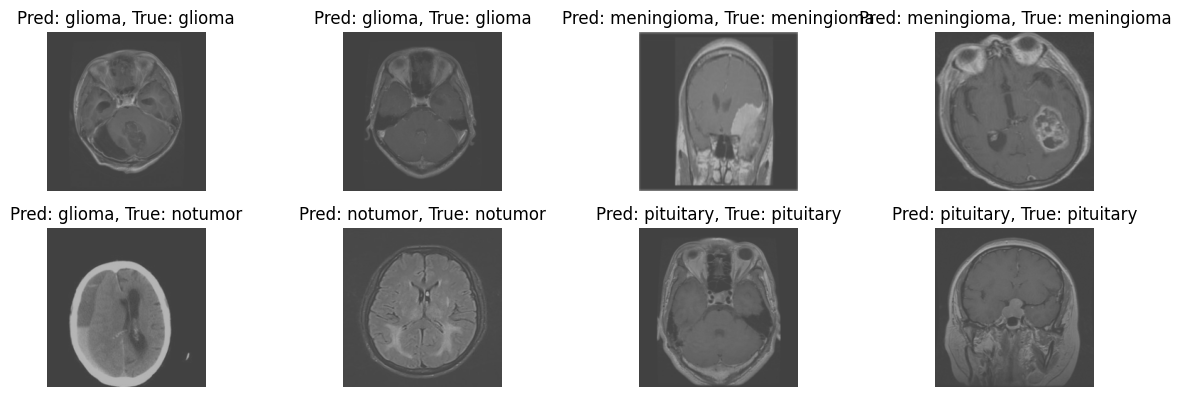

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Class labels (use your dataset's class names)
class_names = train_dataset.classes  # Assuming train_dataset is already defined

# Dictionary to store images for each class
class_images = {class_name: [] for class_name in class_names}

# Collect two images from each class
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Make predictions
        outputs = model(inputs)
        _, preds = torch.max(outputs.logits, 1)

        # Loop through the batch and store images by class
        for i in range(len(labels)):
            label = labels[i].item()
            if len(class_images[class_names[label]]) < 2:  # Only store 2 images per class
                class_images[class_names[label]].append((inputs[i], preds[i], labels[i]))

            # Break if all classes have 2 images
            if all(len(images) == 2 for images in class_images.values()):
                break
        if all(len(images) == 2 for images in class_images.values()):
            break

# Now plot the images
plt.figure(figsize=(12, 8))
idx = 0
for class_name, images in class_images.items():
    for img, pred, label in images:
        ax = plt.subplot(4, 4, idx + 1)
        img = img.cpu().numpy().transpose((1, 2, 0))  # Convert tensor to numpy array
        img = np.clip(img * 0.229 + 0.485, 0, 1)  # De-normalize for visualization
        plt.imshow(img)
        plt.title(f"Pred: {class_names[pred]}, True: {class_names[label]}")
        plt.axis("off")
        idx += 1
plt.tight_layout()
plt.show()


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/brain_tumor_model.pth')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
!pip install gradio
import gradio as gr
import torch
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=4,
    ignore_mismatched_sizes=True
)
model.load_state_dict(torch.load('/content/drive/MyDrive/brain_tumor_model.pth', map_location=device))
model.to(device)
model.eval()

# Load the image processor
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Define class labels and corresponding details
tumor_info = {
    "glioma": {
        "description": "Gliomas are tumors that develop from glial cells in the brain or spinal cord. They can be benign or malignant and often grow aggressively.",
        "symptoms": "Headaches, seizures, memory loss, vision problems, difficulty in speech and movement.",
        "treatments": "Surgery, radiation therapy, chemotherapy, targeted drug therapy, and tumor treating fields (TTF).",
        "prognosis": "Depends on the type and grade of glioma; high-grade gliomas have a poorer prognosis than low-grade gliomas.",
        "resource": "[More info on Glioma (Mayo Clinic)](https://www.mayoclinic.org/diseases-conditions/glioma/symptoms-causes/syc-20350251)"
    },
    "meningioma": {
        "description": "Meningiomas are tumors that arise from the meninges, the protective membranes covering the brain and spinal cord. Most are benign but can cause complications if they grow.",
        "symptoms": "Headaches, vision problems, hearing loss, memory issues, seizures, weakness in limbs.",
        "treatments": "Observation (for slow-growing tumors), surgery, radiation therapy, and stereotactic radiosurgery.",
        "prognosis": "Generally good, especially for benign meningiomas. However, large or aggressive meningiomas may require extensive treatment.",
        "resource": "[More info on Meningioma (Johns Hopkins Medicine)](https://www.hopkinsmedicine.org/health/conditions-and-diseases/meningiomas)"
    },
    "notumor": {
        "description": "No tumor detected in the MRI scan. However, it is always recommended to consult a medical professional for further evaluation.",
        "symptoms": "N/A",
        "treatments": "N/A",
        "prognosis": "No medical concerns detected by the model, but professional diagnosis is advised for confirmation.",
        "resource": "[Consult a Specialist (Cleveland Clinic)](https://my.clevelandclinic.org/)"
    },
    "pituitary": {
        "description": "Pituitary tumors develop in the pituitary gland, which regulates many body functions. Most are benign but can disrupt hormone production.",
        "symptoms": "Hormonal imbalances, vision problems, unexplained weight changes, fatigue, mood swings.",
        "treatments": "Medication (hormone therapy), surgery (transsphenoidal surgery), radiation therapy.",
        "prognosis": "Most pituitary tumors are treatable and have a good prognosis if detected early.",
        "resource": "[More info on Pituitary Tumors (National Cancer Institute)](https://www.cancer.gov/types/pituitary)"
    }
}

# Function to classify an uploaded image and provide tumor details with confidence scores
def classify_tumor(image):
    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt").to(device)

    # Make predictions
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    confidence_scores = {list(tumor_info.keys())[i]: float(probs[0][i]) for i in range(len(tumor_info))}

    # Get the most likely tumor type
    top_class = torch.argmax(probs, dim=1).item()
    tumor_name = list(tumor_info.keys())[top_class]

    # Retrieve tumor details
    tumor_details = tumor_info[tumor_name]

    # Format the response
    result = f"**Predicted Tumor Type:** {tumor_name.capitalize()}\n\n"
    result += f"**Confidence Score:** {confidence_scores[tumor_name] * 100:.2f}%\n\n"
    result += f"**Description:** {tumor_details['description']}\n\n"
    result += f"**Symptoms:** {tumor_details['symptoms']}\n\n"
    result += f"**Possible Treatments:** {tumor_details['treatments']}\n\n"
    result += f"**Prognosis:** {tumor_details['prognosis']}\n\n"
    result += f"[Click here for more information]({tumor_details['resource']})"

    return result

# Create the Gradio interface
interface = gr.Interface(
    fn=classify_tumor,
    inputs=gr.Image(type="pil"),
    outputs="markdown",
    title="Brain Tumor Classification & Information",
    description="Upload an MRI scan image to classify the type of brain tumor and receive information about symptoms, treatments, and prognosis.",
)

# Launch the interface with an external public link
interface.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea0cef2cf4270c6dc9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
